In [27]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [68]:

tips = tips.rename({'sex':'gender'},axis='columns')
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
import matplotlib.pyplot as plt

# (1) 기초그래프 그리기
 
 ## 1) 히스토그램
 - 히스토그램은 데이터프레임의 열 데이터의 분포와 빈도를 살펴보는 용도로
   자주 사용되는 그래프이다.
 - 데이터프레임의 total_bill, tip,..등의 열을 변수라고 부르기도 한다. 그리고
   변수를 하나만 사용해서 그린 그래프를 '일변량 그래프'라 한다.
 - 기본 틀(fig)을 만들어서, 그래프 격자(axes1)를 만들고 그래프를 그린다.
 - hist메서드로 히스토그램을 만든다.
 - set_title로 그래의 제목과 x, y축의 제목은 set_xlabel, set_ylabel로 만든다.

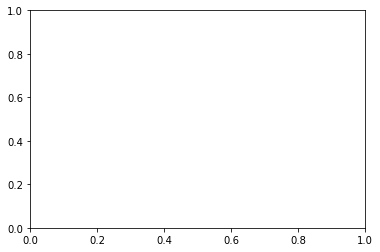

In [4]:
fig = plt.figure() #틀생성
axes1 = fig.add_subplot(1,1,1) #격자생성

Text(0, 0.5, 'Frequency')

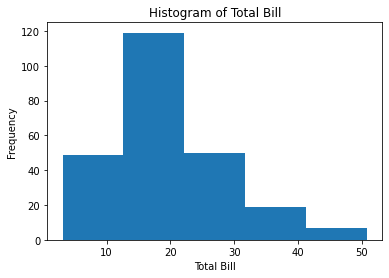

In [5]:
#하나짜리 하기에 편함
plt.hist(tips['total_bill'],bins=5)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

In [6]:
#머신러닝 할때는 서브플롯을 사용하는데 그때는 이런식으로 사용. 여러 히스토그램 비교
axes1.hist(tips['total_bill'],bins=20) 
#bins는 막대개수
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total bill')
axes1.set_ylabel('Frequency')

Text(3.200000000000003, 0.5, 'Frequency')

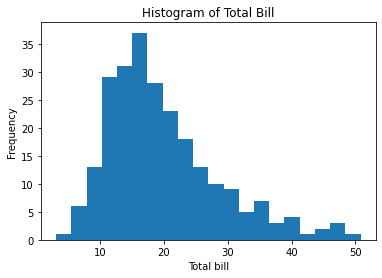

In [7]:
fig

##  2) 산점도그래프
- 산점도 그래프는 2개의 변수를 사용해서 만든다.
- 변수 2개를 사용하기 때문에 '이변량 그래프'라 한다. 
- total_bill열에 따른 tip열의 분포를 나타내는 산점도 그래프이다.
- scatter 메서드를 이용한다.

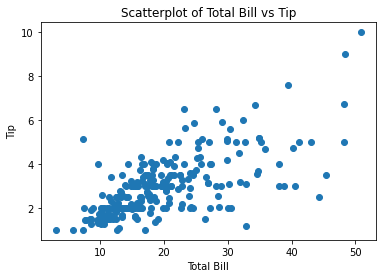

In [14]:
'''
 total_bill열에 따른 tip열의 분포를 나타내는 산점도 그래프이다.
- scatter 메서드를 이용한다.
'''
plt.scatter(tips['total_bill'],tips['tip']) 
plt.title("Scatterplot of Total Bill vs Tip")
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

## 3) 박스 그래프
 - 박스그래프는 Female, Male과 같이 명확하게 구분되는 값과 Tip과 같이
   명확하게 셀 수 없는 범위의 값을 함께 사용하는 그래프이다.
 -  boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있다.
 -  tips 데이터프레임에서 성별이 Female 인 데이터와 Male인 데이터에서
    tip 열 데이터만 추출해서 리스트에 담아 전달한다.
 - labels 인자값으로 성별을 구분하기 위한 이름을 추가한다.

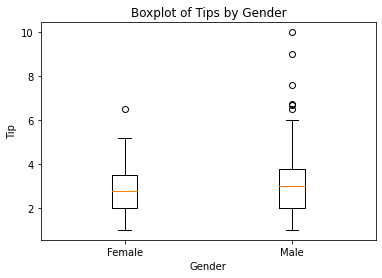

In [16]:
plt.boxplot(
    [tips[tips['gender'] == 'Female']['tip'], #불린추출
    tips[tips['gender'] == 'Male']['tip']],
    labels = ['Female','Male']
)
plt.title('Boxplot of Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.show()

## (2) 다변량 그래프 그리기
- 3개 이상의 변수를 사용한 그래프가 다변량 그래프이다.
- 지불금액(total_bill)과 팁(tip)만을 사용하여 산점도를 그렸는데, 여기에 성별을
  추가하여 산점도 그래프를 표현하려 한다.
- 성별은 산점도 그래프의 색상으로 구분한다.
- 색상을 지정하기 위해서 Female, Male같은 문자는 사용할 수 없고 정수 0, 1를
  사용해야 한다. 
- 문자열을 정수로 치환하는 함수를 만들어 사용한다.

In [21]:
def recode_gender(gender):
    if gender == 'Female':
        return 0 
    else:
        return 1
    
tips['gender_color'] = tips['gender'].apply(recode_gender) #젠더 컬러를 적용
 
tips.head()


#한글폰트 지원하려면
# 컴퓨터 os에 존재하는 한글 font를 가져와서 사용한다.
import platform
 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

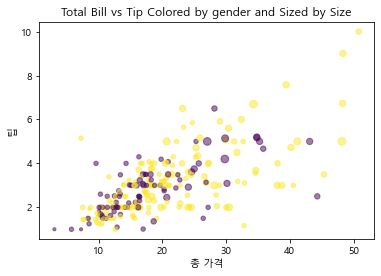

In [22]:
plt.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10 , #테이블당 인원수 * 10
    c = tips['gender_color'],
    alpha = 0.5
)

plt.title('Total Bill vs Tip Colored by gender and Sized by Size')
plt.xlabel('총 가격')
plt.ylabel('팁')
plt.show()

In [80]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips = tips.rename({'sex':'gender'},axis='columns')
tips.head()

 

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## (1) 단변량 그래프 그리기 - 히스토그램
  - 히스토그램은 subplots, distplot 메서드를 사용한다.
  - subplots로 기본 틀을 만들고 displot 메서드에 total_bill열 데이터 전달한다.
  - displot 메서드는 히스토그램과 밀집도 그래프를 같이 그려준다.
  ※ 밀집도 그래프 : 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프
  - 밀집도 그래프를 제외하고 싶으면 kde 인자값을 False로 설정한다.

In [31]:
import warnings

warnings.filterwarnings(action='ignore')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

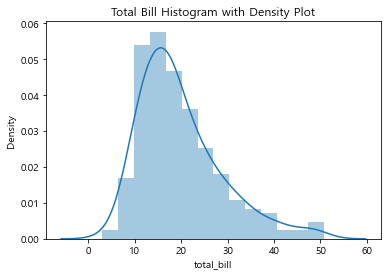

In [35]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram ')

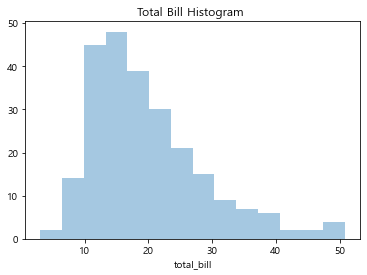

In [37]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False) # kde = false하면 그냥 히스토그램으로만 나옴
ax.set_title('Total Bill Histogram ')

Text(0.5, 1.0, 'Total Bill Density Plot')

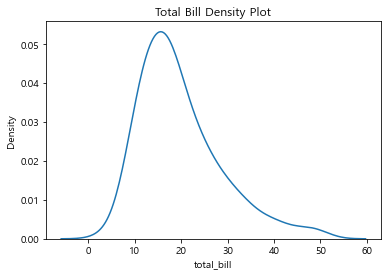

In [38]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False) # hist= false하면 그냥 밀집도만 나옴
ax.set_title('Total Bill Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density and Rug Plot')

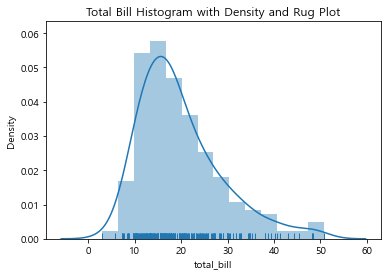

In [39]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True) # rug는 양탄자그래프로 데이터의 밀집정도를 나타낸다
ax.set_title('Total Bill Histogram with Density and Rug Plot')

Text(0.5, 1.0, 'Count of days')

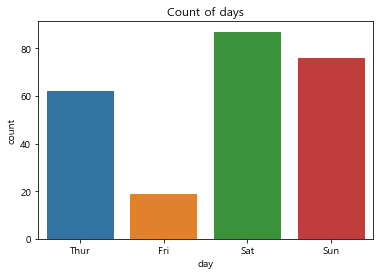

In [40]:
ax = plt.figure()
ax = sns.countplot('day',data = tips)
ax.set_title('Count of days')

## (2) 다양한 종류의 이변량 그래프 그리기

1) seaborn의 산점도 그래프
- matplotlib보다 다양한 방법으로 산점도 그래프를 그릴 수 있다.
- regplot 메서드로 산점도 그래프와 회귀선을 함께 그릴 수 있다.


Text(0.5, 1.0, 'Scatterplot of Total Bill and Tip')

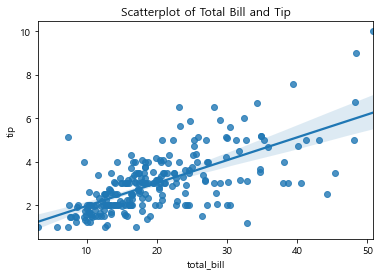

In [41]:
ax = plt.figure()
ax = sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')

Text(0.5, 1.0, 'Scatterplot of Total Bill and Tip')

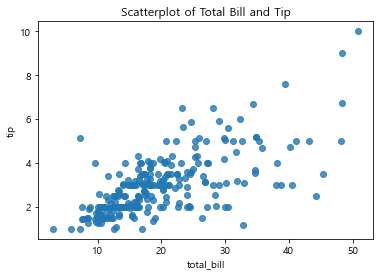

In [42]:
ax = plt.figure()
ax = sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=False) #회귀선 없이
ax.set_title('Scatterplot of Total Bill and Tip')

산점도와 히스토그램을 같이 그려주는 jointplot

<Figure size 432x288 with 0 Axes>

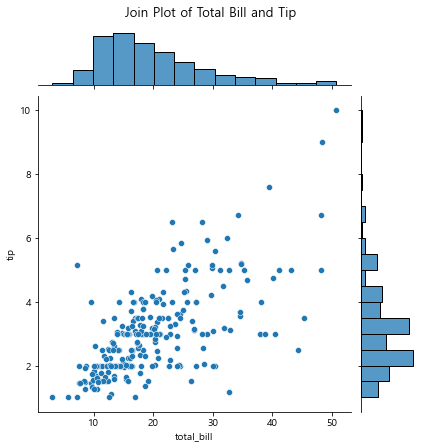

In [46]:
ax = plt.figure()
ax = sns.jointplot(x='total_bill',y='tip',data=tips)
ax.fig.suptitle('Join Plot of Total Bill and Tip', fontsize = 13, y=1.03)
plt.show()

<Figure size 432x288 with 0 Axes>

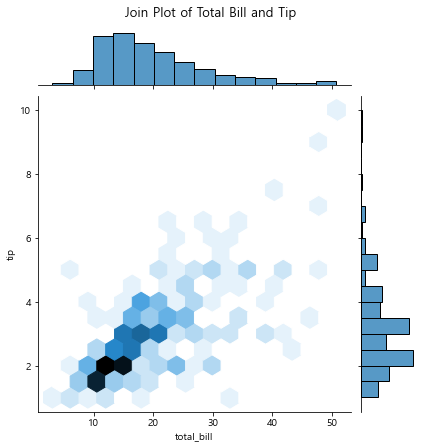

In [47]:
ax = plt.figure()
ax = sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') #분포를 육각형으로 보여줌
ax.fig.suptitle('Join Plot of Total Bill and Tip', fontsize = 13, y=1.03)
plt.show()

2) 이차원 밀집도 그리기
- 이차원 밀집도는 kdeplot 메서드로 만든다. total_bill,tip열을 사용한다.
- shade = True로 지정하면 그래프에 음영 효과를 줄 수 있다.

Text(0.5, 1.0, 'Kernel Density Plot of Total Bill and Tip')

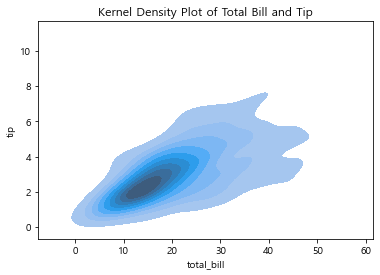

In [53]:
ax = plt.figure()
ax = sns.kdeplot(data=tips['total_bill'],
                data2 = tips['tip'],
                shade = True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')

3) 바 그래프 그리기
- 지정한 변수의 평균을 계산하여 그릴 수 있다.
- 다음은 시간에 따른 지불한 비용의 평균을 나타낸것이다.

Text(0, 0.5, 'Average total bill')

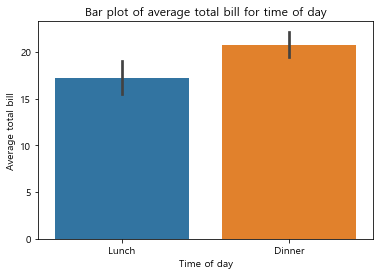

In [55]:
ax = plt.subplots()
ax = sns.barplot(x='time',y='total_bill',data = tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

4) 박스 그래프 그리기
- 박스 그래프는 최솟값, 1분위수(25%위치값), 2분위값(중간값),3분위값(75%위치값),
  최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프이다.
※ 사분위수는 데이터 표본을 4개의 동일한 부분으로 나눈 값이다.
   사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있다.
   이는 데이터를 이해하는 데 중요한 단계이다.

Text(0, 0.5, 'Average total bill')

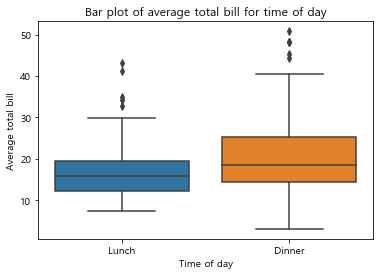

In [56]:
ax = plt.subplots()
ax = sns.boxplot(x='time',y='total_bill',data = tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')


5) 바이올린 그래프
- 데이터의 분산을 확인하기 좋은 그래프이다.
- violinplot 메서드를 사용하여 그릴 수 있다.
※ 분산 : 통계 분석에서 자주 사용하는 기본 단위로 데이터가 평균을 중심으로 퍼져있는
   정도이다. 분산이 크면 들죽날죽 불안정하다는 의미이다.

Text(0, 0.5, 'Total Bill')

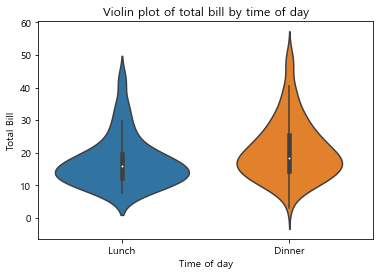

In [57]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data = tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

6) 관계 그래프 그리기
- 종합적 그래프이다. pairplot 메서드에 데이터프레임을 넣는 방법으로 간단하게 그린다.
- 관계그래프는 중복된 정보가 표현되는 단점이 있다. 
- 관계그래프의 절반(대각선을 기준으로 위)은 나머지 절반(대각선을 기준으로 아래)과   
  같다. 

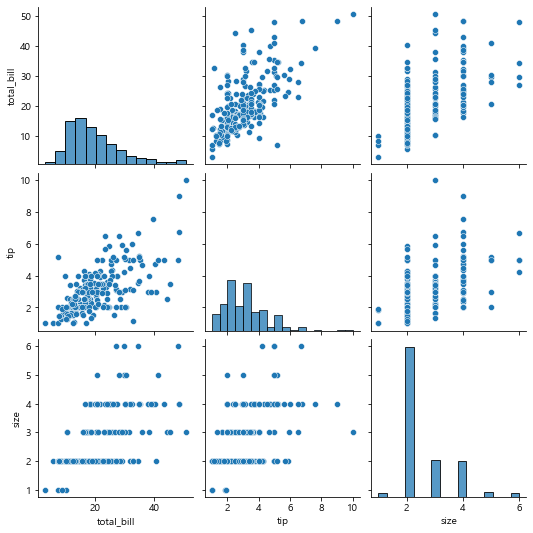

In [58]:
sns.pairplot(tips)


- 중복된 그래프가 그려진 위치를 직접 지정하여 원하는 그래프로 교체할 수 있다.
- map_upper : 대각선을 기준으로 위쪽에 그릴 그래프를 지정한다.
- map_lower : 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다. 
- map_diag : 대각선을 중심으로 그래프를 그린다.

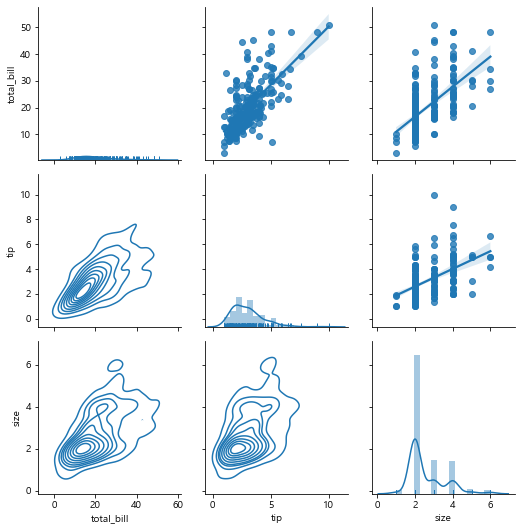

In [60]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) #산점도
pair_grid = pair_grid.map_lower(sns.kdeplot) #밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) #히스토그램, 밀집도

# (3) 다변량 그래프
 ## 1) 바이올린 그래프
  - 시간에 따른 지불 금액을 그래프로 그린다. 색상을 추가하여 성별을 그래프에 추가한다.
  - 색상의 성별을 나타내기위한 방법으로 hue = 'gender'를 지정한다.


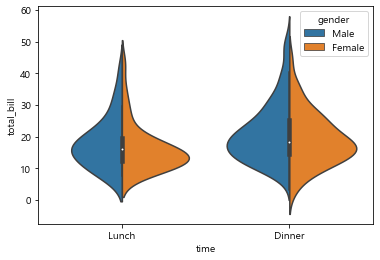

In [70]:
ax = plt.figure()
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips,split=True )


<Figure size 432x288 with 0 Axes>

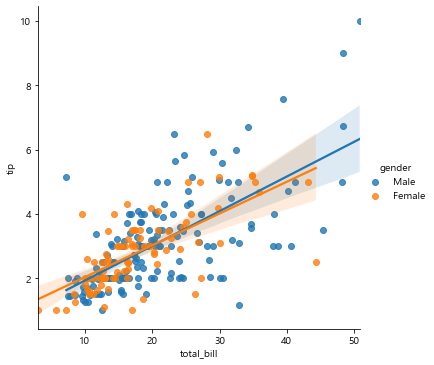

In [74]:
# 다변량 산점도

ax = plt.figure()
ax = sns.lmplot(x='total_bill',y='tip',hue='gender',data=tips)

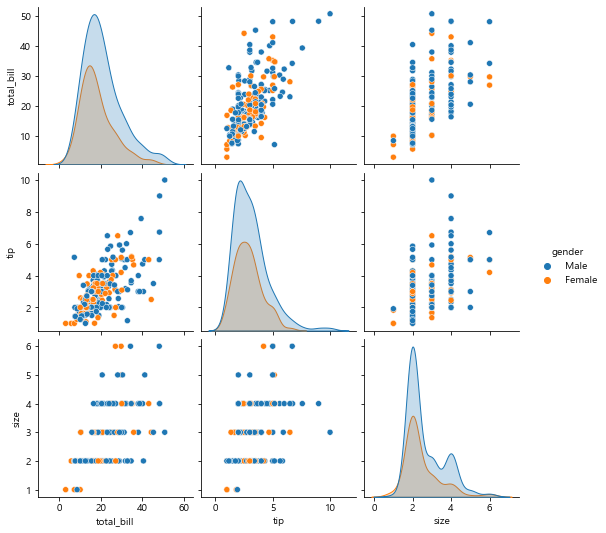

In [75]:
sns.pairplot(tips,hue='gender')

## 3) lmplot메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
- 4개의 그룹이 한꺼번에 산점도 그래프를 그릴 수 있다.
- col, col_wrap인자로 데이터 그룹을 구분할 열과 하나의 행에 보여줄 열의
  최대값을 지정한다.
- day별 그룹으로 지불금액과 팀의 그래프를 그린다.

<Figure size 432x288 with 0 Axes>

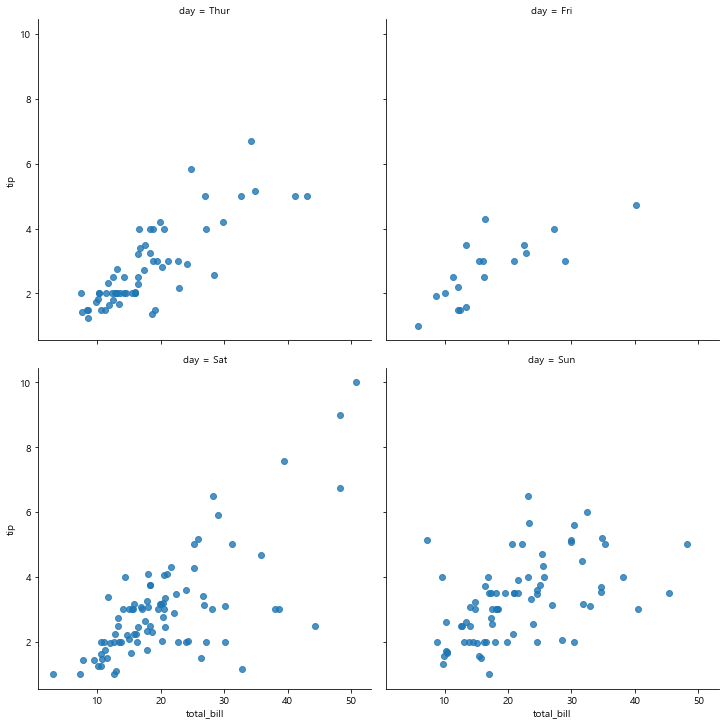

In [84]:
ax = plt.figure()
ax = sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,col='day',col_wrap=2)
# i대문자 아니고 엘 임
plt.show()


※ FacetGrid 클래스로 그룹별 그래프 그리기
- FacetGrid에 데이터프레임을 그룹을 구분할 이름을 전달하여 객체생성한다.
- 객체에 map 메서드에 그래프의 종류와 x축(다변량이면 y축도)으로 지정할 열 이름을 순서대로
  전달하면 히스토그램, 밀집도, 양탄자를 그릴 수 있다.
- 시간에 따른 지불금액을 그룹별 그래프를 그린다.

<Figure size 432x288 with 0 Axes>

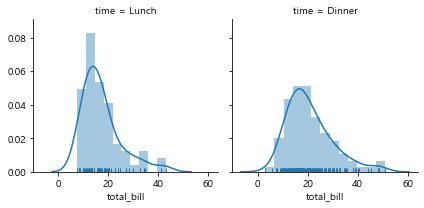

In [86]:
ax = plt.figure()
ax = sns.FacetGrid(tips,col = 'time')
ax.map(sns.distplot,'total_bill',rug=True)

다변량 그래프를 산점도로 그린다.
- 산점도는 map 메서드에 그래프 종류로 plt.scatter를 전달한다.
- day별 그룹으로 구분하여 지불금액의 그래프를 그린다.

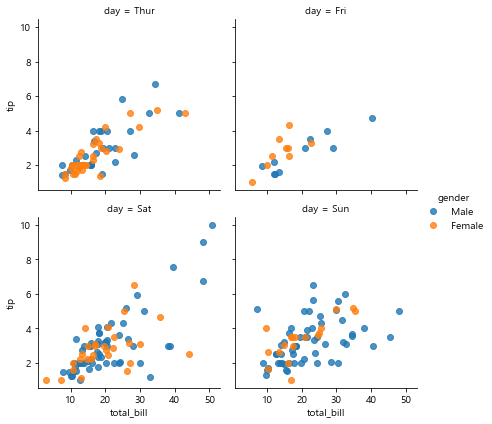

In [90]:
ax = sns.FacetGrid(tips,col='day',hue='gender',col_wrap=2)
ax.map(sns.regplot,'total_bill','tip',fit_reg=False)
ax.add_legend() #색상에 대한설명
plt.show()


col = 'time', row = 'smoker' 을 사용하여 산점도 그래프를 그린다.
- 열로 time 구분하고 행으로는 smoker를 구분하여 그래프를 그린다.
(1열1행은 흡연자 점심 2행2열은 비흡연자 저녁)

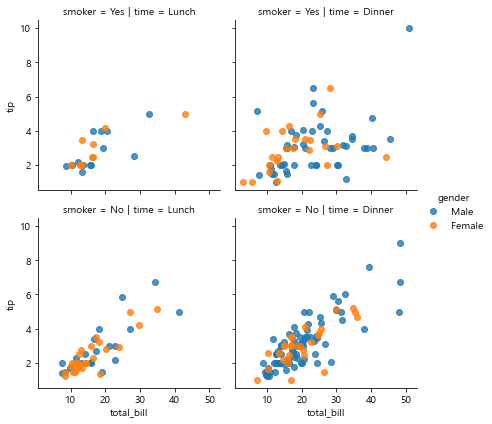

In [93]:
ax = sns.FacetGrid(tips,col='time',row='smoker',hue='gender')
ax.map(sns.regplot, 'total_bill', 'tip',fit_reg=False)
ax.add_legend()


## (4) seaborn 의 그래프 스타일 설정
- seaborn의 style은 darkgrid, whitegrid, dark, white, ticks로 5종류이다.
- set_style메서드를 사용하여 그래프의 스타일을 설정할 수 있다.

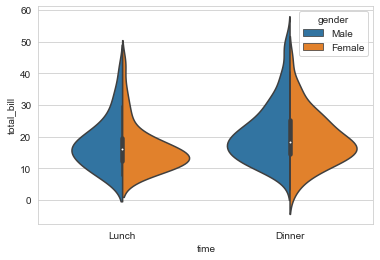

In [94]:
ax = plt.figure()
sns.set_style('whitegrid')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips,split=True)

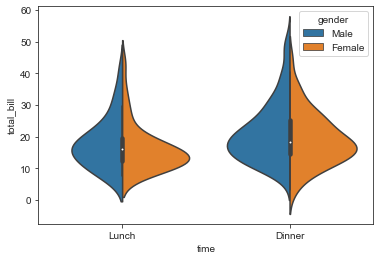

In [101]:
ax = plt.figure()
sns.set_style('ticks')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips,split=True)

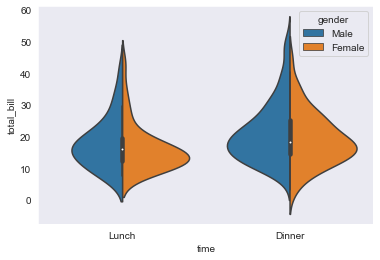

In [98]:
ax = plt.figure()
sns.set_style('dark')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips,split=True)

# 3. DataFrame과 Series로 그래프 그리기
- Pandas의 자료형 DataFrame과 Series로 간편하게 그래프를 그릴 수 있다.
- Series의  plot 속성에 정의된 hist 메서드로 시리즈의 값을 히스토그램을 
  바로 그릴 수 있있다. 
- sns.set_style('white')로 하면 스타일이 없이 설정된다.

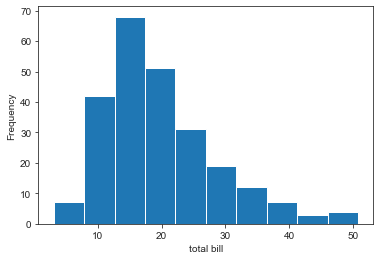

In [103]:
tips['total_bill'].plot.hist()
plt.xlabel('total bill')
plt.show()

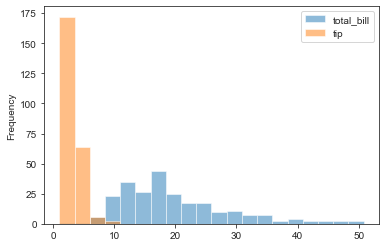

In [105]:
tips[['total_bill','tip']].plot.hist(alpha=0.5,bins=20)
plt.show()

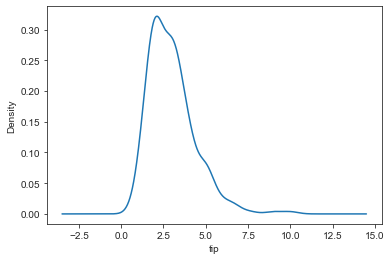

In [106]:
tips['tip'].plot.kde()
plt.xlabel('tip')
plt.show()

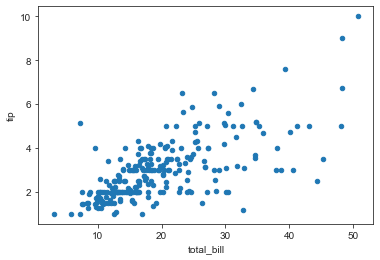

In [107]:
tips.plot.scatter(x='total_bill',y='tip')
plt.show()

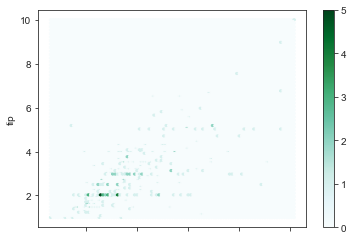

In [108]:
tips.plot.hexbin(x='total_bill',y='tip')
plt.show()

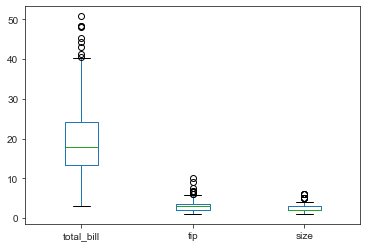

In [109]:
tips.plot.box()
plt.show()

In [ ]:
데이터분석 조금 재밌잖아..?